In [102]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [291]:
#Univariate gaussian data generator
#based on CLT
def generate_norm(mean,var):
    s = np.random.uniform(0,1,12)
    z = s.sum()-6
    x = mean+np.power(var,0.5)*z
    return x
    
#Polynomial basis linear model data generator
def generate_poly(n,a,w):
    x = np.random.uniform(-1,1,1)
    e = generate_norm(0,a)
    x_array = np.array([])
    for i in range(n):
        x_array = np.append(x_array,np.power(x,i))
    
    y = np.dot(w,x_array)+e
    return x,y,x_array

In [61]:
def seq_estimator(mean,var):
    print('Data point source function: N(%f,%f)'%(mean,var))
    n = 1
    fix_mean = mean
    fix_var = var
    sum_var = var
    mean_n = mean
    var_n = var
    while True:
        x = generate_norm(fix_mean,fix_var)
        print('Add data point: %f'%x)
        n += 1
        mean = (mean*(n-1)+x)/n
        sum_var += x*x
        var = (sum_var-mean*mean*n)/(n-1)
        print('Mean = %f Variance = %f'%(mean,var))
        if np.abs(mean_n-mean)<0.001 and np.abs(var_n-var)<0.001:
            break
        else:
            mean_n = mean
            var_n = var
            print('\n')
    
        
    

In [26]:
seq_estimator(3,5)

Data point source function: N(3.000000,5.000000)
Add data point: 1.681584
Mean = 2.340792 Variance = -3.130890


Add data point: 4.805161
Mean = 3.162248 Variance = 0.458927


Add data point: 5.400400
Mean = 3.721786 Variance = 1.558282


Add data point: 0.388135
Mean = 3.055056 Variance = 3.391358


Add data point: 6.692128
Mean = 3.661235 Variance = 4.917801


Add data point: 3.679579
Mean = 3.663855 Variance = 4.098216


Add data point: 2.639812
Mean = 3.535850 Variance = 3.643840


Add data point: 7.436063
Mean = 3.969207 Variance = 4.878545


Add data point: 3.161404
Mean = 3.888427 Variance = 4.401739


Add data point: 3.124349
Mean = 3.818965 Variance = 4.014639


Add data point: 2.830276
Mean = 3.736574 Variance = 3.731131


Add data point: -0.543591
Mean = 3.407331 Variance = 4.829420


Add data point: 5.629415
Mean = 3.566051 Variance = 4.810616


Add data point: 2.554117
Mean = 3.498589 Variance = 4.535268


Add data point: 5.853601
Mean = 3.645777 Variance = 4.579547


Add 



Add data point: 3.234399
Mean = 3.071422 Variance = 4.828657


Add data point: 5.287435
Mean = 3.073563 Variance = 4.828731


Add data point: 2.361761
Mean = 3.072876 Variance = 4.824555


Add data point: 3.158819
Mean = 3.072959 Variance = 4.819905


Add data point: 5.138873
Mean = 3.074949 Variance = 4.819369


Add data point: 0.785070
Mean = 3.072746 Variance = 4.819773


Add data point: 2.978238
Mean = 3.072655 Variance = 4.815143


Add data point: 2.003798
Mean = 3.071628 Variance = 4.811610


Add data point: 1.115950
Mean = 3.069751 Variance = 4.810659


Add data point: 3.015013
Mean = 3.069699 Variance = 4.806045


Add data point: 5.644949
Mean = 3.072165 Variance = 4.807789


Add data point: 0.984404
Mean = 3.070167 Variance = 4.807355


Add data point: 1.282700
Mean = 3.068459 Variance = 4.805809


Add data point: 4.780604
Mean = 3.070094 Variance = 4.804015


Add data point: 4.004229
Mean = 3.070985 Variance = 4.800259


Add data point: 1.680799
Mean = 3.069660 Variance = 4


Add data point: 3.342635
Mean = 3.009734 Variance = 5.008846


Add data point: 5.043246
Mean = 3.010878 Variance = 5.008353


Add data point: 4.665835
Mean = 3.011807 Variance = 5.007077


Add data point: -1.914131
Mean = 3.009041 Variance = 5.017888


Add data point: -0.336483
Mean = 3.007164 Variance = 5.021351


Add data point: 0.491343
Mean = 3.005753 Variance = 5.022083


Add data point: 2.584348
Mean = 3.005517 Variance = 5.019366


Add data point: 5.303437
Mean = 3.006804 Variance = 5.019511


Add data point: 3.454669
Mean = 3.007055 Variance = 5.016811


Add data point: -0.152031
Mean = 3.005287 Variance = 5.019587


Add data point: 8.895331
Mean = 3.008581 Variance = 5.036181


Add data point: 0.745931
Mean = 3.007317 Variance = 5.036226


Add data point: 2.026813
Mean = 3.006769 Variance = 5.033948


Add data point: 2.497013
Mean = 3.006484 Variance = 5.031281


Add data point: 5.831550
Mean = 3.008061 Variance = 5.032925


Add data point: 5.298750
Mean = 3.009338 Variance =

In [573]:
def draw(X,X_plot,X_plot_array,y,mean,var,a,n,title,groud_truth=False):
    if groud_truth:
        var_y = a
        plt.plot(X_plot,np.dot(X_plot_array.reshape(-1,n),mean),'black')
        plt.plot(X_plot,np.dot(X_plot_array.reshape(-1,n),mean)+var_y,'red')
        plt.plot(X_plot,np.dot(X_plot_array.reshape(-1,n),mean)-var_y,'red')
        plt.title('%s'%title)
        plt.show()
    else:
        var_y = np.zeros((len(X_plot)))
        for i in range(len(X_plot)):
            #print(X_plot_array[i].shape,var.shape,X_plot_array.shape)
            var_y[i] = a +  X_plot_array[i].reshape(1,-1).dot(inv(var).dot(X_plot_array[i].reshape(1,-1).T))
            
        #var_y = (1/a) +  X_plot_array.reshape(-1,n).dot(inv(var).dot(X_plot_array.reshape(-1,n).T)).diagonal()
        plt.scatter(np.asarray(X[:,1]).reshape(-1,),np.asarray(y).reshape(-1,))
        plt.plot(X_plot,np.dot(X_plot_array.reshape(-1,n),mean),'black')
        plt.plot(X_plot,np.dot(X_plot_array.reshape(-1,n),mean)+var_y.reshape(-1,1),'red')
        plt.plot(X_plot,np.dot(X_plot_array.reshape(-1,n),mean)-var_y.reshape(-1,1),'red')
        
        plt.title('%s'%title)
        plt.show()

In [596]:
def Baysian(b,n,a,w):
    
    mean = np.zeros((n,1))
    var = b*np.identity(n)
    n1 = 0
    weights = []
    for i in range(n):
        weights.append(generate_norm(0,(1/b)))
    mean_prior = np.matrix(weights).T
    var_prior = var
    
    while True:
        
        new_x,new_y,new_x_array = generate_poly(n,a,w)
        new_x_array = new_x_array.reshape(1,-1)
        
        if n1 == 0:
            X_plot = np.matrix([new_x])
            X = np.matrix(new_x_array)
            y = np.matrix([new_y])
        else:
            X_plot = np.concatenate((X_plot,np.matrix([new_x])),axis=0)
            X = np.append(X,new_x_array,axis=0)
            y = np.concatenate((y,np.matrix([new_y])),axis=0)
        #a = (1/a)
        print('Add data point (%f,%f):\n'%(new_x,new_y))
        
        '''if n1 ==0:
            var_post = a*np.dot(X.T,X)+b*np.identity(n)
            mean_post = a*inv(var_post).dot(np.dot(X.T,y))
            
        else:'''
        #print(np.dot(X.T,X),inv(var_prior))
        
        var_post = (1/a)*np.dot(new_x_array.T,new_x_array)+(var_prior)
        mean_post = np.dot(inv(var_post),((1/a)*np.dot(new_x_array.T,new_y)+np.dot((var_prior),mean_prior)))
        #print(mean_post.shape,var_post.shape)
        
        print('Postirior mean:\n',mean_post)
        print('Postirior variance:\n',inv(var_post))
        
        mean_y = np.dot(X[-1,:],mean_post)
        var_y = a+np.dot(np.dot(X[-1,:],inv(var_post)),X[-1,:].T)
        
        if n1 == 9:
            X_10 = X
            y_10 = y
            mean_10 = mean_post
            var_10 = var_post
        
        if n1 == 49:
            X_50 = X
            y_50 = y
            mean_50 = mean_post
            var_50 = var_post
        
        print('Predictive distribution ~ N(%f,%f)'%(mean_y,var_y))
        if (np.abs(mean_prior-mean_post)<0.0001).all() and (np.abs(inv(var_prior)-inv(var_post))<0.0001).all():
            break
        else:
            #print(np.abs(mean_prior-mean_post))
            mean_prior = mean_post
            var_prior = var_post
            n1 += 1
            print('\n')
            #print(X.shape,y.shape)
    #visualization
    interval = np.arange(-2,2,0.01)
    interval_array = np.array([])
    for i in interval:
        interval_array = np.append(interval_array,[i**j for j in range(n)])
    interval_array = interval_array.reshape(-1,n)
    draw(X,interval,interval_array,y,w,a,a,n,'ground truth',True)
    draw(X,interval,interval_array,y,mean_post,var_post,a,n,'predict result')
    draw(X_10,interval,interval_array,y_10,mean_10,var_10,a,n,'After 10 incomes')
    draw(X_50,interval,interval_array,y_50,mean_50,var_50,a,n,'After 50 incomes')
    #return X,y,mean_post,var_post,X_10,y_10,mean_10,var_10,X_50,y_50,mean_50,var_50
    #print((mean_post),(mean_10))

Add data point (0.217781,2.550826):

Postirior mean:
 [[ 0.53262156]
 [ 1.11589978]
 [ 0.48801533]
 [-0.86262169]]
Postirior variance:
 [[ 5.12143897e-01 -1.06245818e-01 -2.31383268e-02 -5.03908929e-03]
 [-1.06245818e-01  9.76861673e-01 -5.03908929e-03 -1.09741820e-03]
 [-2.31383268e-02 -5.03908929e-03  9.98902582e-01 -2.38996896e-04]
 [-5.03908929e-03 -1.09741820e-03 -2.38996896e-04  9.99947951e-01]]
Predictive distribution ~ N(0.789879,1.512144)


Add data point (-0.281640,-0.057899):

Postirior mean:
 [[ 0.42337128]
 [ 1.19308329]
 [ 0.47638552]
 [-0.85714491]]
Postirior variance:
 [[ 3.35515230e-01  1.85394122e-02 -4.19406317e-02  3.81540987e-03]
 [ 1.85394122e-02  8.88702973e-01  8.24442804e-03 -7.35297535e-03]
 [-4.19406317e-02  8.24442804e-03  9.96901057e-01  7.03573731e-04]
 [ 3.81540987e-03 -7.35297535e-03  7.03573731e-04  9.99504070e-01]]
Predictive distribution ~ N(0.144287,1.395049)


Add data point (0.842298,7.257883):

Postirior mean:
 [[1.1163557 ]
 [2.83863318]
 [1.9166



Add data point (0.995090,10.980123):

Postirior mean:
 [[0.86873371]
 [2.62109497]
 [2.94558667]
 [2.71746848]]
Postirior variance:
 [[ 0.01896036 -0.00118298 -0.03211619  0.00267545]
 [-0.00118298  0.11215414  0.00310052 -0.15286178]
 [-0.03211619  0.00310052  0.10482736 -0.01243907]
 [ 0.00267545 -0.15286178 -0.01243907  0.28062735]]
Predictive distribution ~ N(9.071322,1.126649)


Add data point (0.713403,5.340779):

Postirior mean:
 [[0.86904465]
 [2.62391862]
 [2.94773297]
 [2.7162421 ]]
Postirior variance:
 [[ 0.01895303 -0.00124954 -0.03216678  0.00270436]
 [-0.00124954  0.11154974  0.0026411  -0.15259927]
 [-0.03216678  0.0026411   0.10447815 -0.01223953]
 [ 0.00270436 -0.15259927 -0.01223953  0.28051334]]
Predictive distribution ~ N(5.227402,1.025547)


Add data point (-0.259332,-0.055272):

Postirior mean:
 [[0.86245182]
 [2.63447964]
 [2.9576268 ]
 [2.70211792]]
Postirior variance:
 [[ 0.01866798 -0.00079291 -0.031739    0.00209367]
 [-0.00079291  0.11081827  0.00195584 -0

Add data point (-0.703308,0.973188):

Postirior mean:
 [[0.88367707]
 [2.60459353]
 [3.09896719]
 [2.99060748]]
Postirior variance:
 [[ 0.00953457 -0.0008538  -0.01598391  0.00098946]
 [-0.0008538   0.066039    0.00046321 -0.09112792]
 [-0.01598391  0.00046321  0.05007684 -0.00039492]
 [ 0.00098946 -0.09112792 -0.00039492  0.15863041]]
Predictive distribution ~ N(-0.455665,1.013572)


Add data point (0.321492,-0.000404):

Postirior mean:
 [[0.86750087]
 [2.56776307]
 [3.12156105]
 [3.03946314]]
Postirior variance:
 [[ 0.00947684 -0.00098523 -0.01590328  0.00116381]
 [-0.00098523  0.06573974  0.00064679 -0.09073095]
 [-0.01590328  0.00064679  0.04996422 -0.00063844]
 [ 0.00116381 -0.09073095 -0.00063844  0.15810383]]
Predictive distribution ~ N(2.116648,1.011236)


Add data point (0.540984,3.139696):

Postirior mean:
 [[0.8652377 ]
 [2.55744169]
 [3.12208297]
 [3.05113618]]
Postirior variance:
 [[ 0.00945705 -0.00107547 -0.01589872  0.00126587]
 [-0.00107547  0.06532821  0.0006676  -0.0

Add data point (0.977187,10.495822):

Postirior mean:
 [[0.90512595]
 [2.38371177]
 [3.1226343 ]
 [3.23126882]]
Postirior variance:
 [[ 6.50821087e-03 -1.97783226e-04 -1.07690640e-02  2.93672376e-04]
 [-1.97783226e-04  4.76751901e-02  3.09461512e-05 -6.57049681e-02]
 [-1.07690640e-02  3.09461512e-05  3.26966053e-02 -7.19367641e-04]
 [ 2.93672376e-04 -6.57049681e-02 -7.19367641e-04  1.11367147e-01]]
Predictive distribution ~ N(9.231369,1.037361)


Add data point (-0.952337,-2.466162):

Postirior mean:
 [[0.90880171]
 [2.371351  ]
 [3.10109663]
 [3.26883905]]
Postirior variance:
 [[ 6.49751498e-03 -1.61815293e-04 -1.07063927e-02  1.84348764e-04]
 [-1.61815293e-04  4.75542379e-02 -1.79803768e-04 -6.53373367e-02]
 [-1.07063927e-02 -1.79803768e-04  3.23293900e-02 -7.87986614e-05]
 [ 1.84348764e-04 -6.53373367e-02 -7.87986614e-05  1.10249741e-01]]
Predictive distribution ~ N(-1.360354,1.031984)


Add data point (0.617923,5.253846):

Postirior mean:
 [[0.91095941]
 [2.3839493 ]
 [3.10247964]


Add data point (0.039429,2.249249):

Postirior mean:
 [[0.90657889]
 [2.42713988]
 [3.14544896]
 [3.21025836]]
Postirior variance:
 [[ 0.00500775 -0.00013234 -0.00842389  0.00019949]
 [-0.00013234  0.03757965 -0.00010297 -0.05252706]
 [-0.00842389 -0.00010297  0.02592581 -0.00050632]
 [ 0.00019949 -0.05252706 -0.00050632  0.09004739]]
Predictive distribution ~ N(1.007365,1.005029)


Add data point (0.483585,3.187451):

Postirior mean:
 [[0.90660426]
 [2.42724214]
 [3.14542807]
 [3.21013019]]
Postirior variance:
 [[ 4.99883204e-03 -1.68288499e-04 -8.41654376e-03  2.44553772e-04]
 [-1.68288499e-04  3.74347608e-02 -7.33614004e-05 -5.23454472e-02]
 [-8.41654376e-03 -7.33614004e-05  2.59197577e-02 -5.43431332e-04]
 [ 2.44553772e-04 -5.23454472e-02 -5.43431332e-04  8.98197535e-02]]
Predictive distribution ~ N(3.178983,1.006505)


Add data point (-0.859189,0.504831):

Postirior mean:
 [[0.90491587]
 [2.428365  ]
 [3.16076399]
 [3.19338044]]
Postirior variance:
 [[ 4.99735254e-03 -1.67304558e-

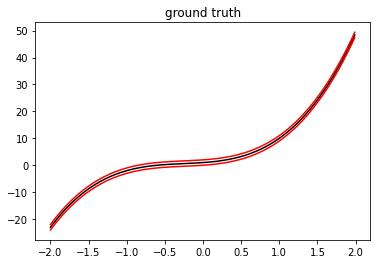

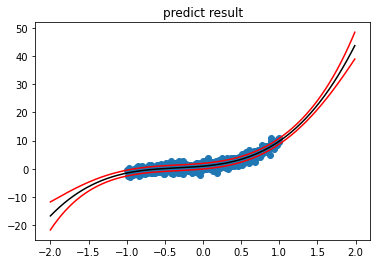

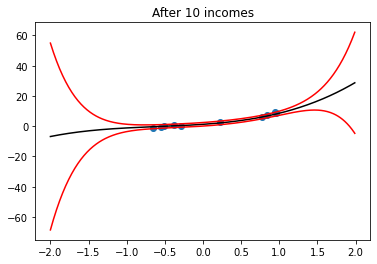

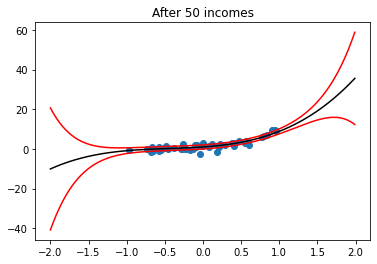

In [597]:
Baysian(1,4,1,[1,2,3,4])

Add data point (-0.254744,1.311516):

Postirior mean:
 [[ 0.15652457]
 [ 0.13764228]
 [-0.02190047]
 [ 0.03675302]]
Postirior variance:
 [[ 9.90105806e-03  2.52048897e-05 -6.42080085e-06  1.63566213e-06]
 [ 2.52048897e-05  9.99357920e-03  1.63566213e-06 -4.16675532e-07]
 [-6.42080085e-06  1.63566213e-06  9.99958332e-03  1.06145698e-07]
 [ 1.63566213e-06 -4.16675532e-07  1.06145698e-07  9.99997296e-03]]
Predictive distribution ~ N(0.119432,1.010581)


Add data point (-0.283043,0.692002):

Postirior mean:
 [[ 0.16217253]
 [ 0.13604194]
 [-0.02144706]
 [ 0.03662458]]
Postirior variance:
 [[ 9.80422078e-03  5.26435383e-05 -1.41946419e-05  3.83790999e-06]
 [ 5.26435383e-05  9.98580451e-03  3.83836431e-06 -1.04067802e-06]
 [-1.41946419e-05  3.83836431e-06  9.99895926e-03  2.82936334e-07]
 [ 3.83790999e-06 -1.04067802e-06  2.82936334e-07  9.99992288e-03]]
Predictive distribution ~ N(0.121118,1.010641)


Add data point (-0.036660,2.758552):

Postirior mean:
 [[ 0.18742432]
 [ 0.1352345 ]
 [-0.

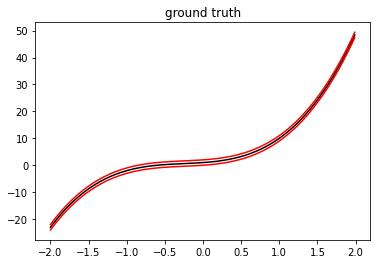

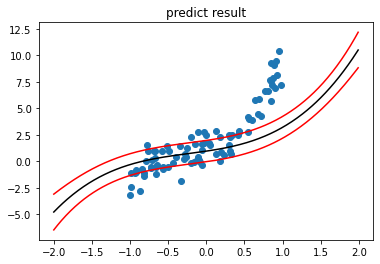

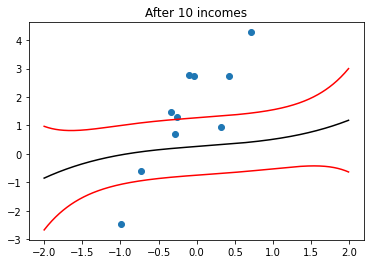

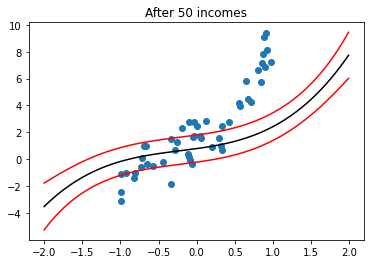

In [598]:
Baysian(100,4,1,[1,2,3,4])

Add data point (0.845093,1.447971):

Postirior mean:
 [[ 0.25065897]
 [ 0.99434119]
 [-1.10490955]]
Postirior variance:
 [[ 0.80858456 -0.16176388 -0.13670554]
 [-0.16176388  0.86329446 -0.11552892]
 [-0.13670554 -0.11552892  0.9023673 ]]
Predictive distribution ~ N(0.301863,4.277261)


Add data point (0.340660,0.146112):

Postirior mean:
 [[ 0.18901477]
 [ 0.98440285]
 [-1.09894727]]
Postirior variance:
 [[ 0.66426199 -0.18503172 -0.12274653]
 [-0.18503172  0.85954319 -0.11327843]
 [-0.12274653 -0.11327843  0.90101718]]
Predictive distribution ~ N(0.396829,3.612634)


Add data point (-0.143050,-0.304490):

Postirior mean:
 [[ 0.12810334]
 [ 1.01186687]
 [-1.09114952]]
Postirior variance:
 [[ 0.53730674 -0.12778955 -0.106494  ]
 [-0.12778955  0.83373358 -0.12060645]
 [-0.106494   -0.12060645  0.89893656]]
Predictive distribution ~ N(-0.038973,3.587652)


Add data point (-0.863948,1.601401):

Postirior mean:
 [[ 0.49644195]
 [ 0.40375429]
 [-0.65769468]]
Postirior variance:
 [[ 0.471113

Add data point (0.493852,2.491054):

Postirior mean:
 [[1.39625097]
 [1.97010756]
 [1.97394722]]
Postirior variance:
 [[ 0.02975865 -0.00354929 -0.04796063]
 [-0.00354929  0.04108615  0.01084142]
 [-0.04796063  0.01084142  0.14494402]]
Predictive distribution ~ N(2.850617,3.024112)


Add data point (-0.729280,2.563930):

Postirior mean:
 [[1.39975032]
 [1.95591083]
 [1.98480523]]
Postirior variance:
 [[ 0.02974326 -0.00348684 -0.0480084 ]
 [-0.00348684  0.04083276  0.01103521]
 [-0.0480084   0.01103521  0.1447958 ]]
Predictive distribution ~ N(1.028961,3.037876)


Add data point (0.841001,5.311622):

Postirior mean:
 [[1.39774186]
 [1.96677825]
 [2.00270755]]
Postirior variance:
 [[ 0.02972663 -0.00339688 -0.04786021]
 [-0.00339688  0.04034603  0.01023339]
 [-0.04786021  0.01023339  0.14347493]]
Predictive distribution ~ N(4.468283,3.068795)


Add data point (-0.746932,1.045557):

Postirior mean:
 [[1.39774102]
 [1.96678247]
 [2.00270383]]
Postirior variance:
 [[ 0.02971645 -0.00334597

Postirior mean:
 [[1.26972899]
 [2.01341354]
 [2.24816807]]
Postirior variance:
 [[ 0.02015776 -0.00117677 -0.03294399]
 [-0.00117677  0.02698386  0.00597035]
 [-0.03294399  0.00597035  0.09878535]]
Predictive distribution ~ N(2.688453,3.016463)


Add data point (0.096116,2.397503):

Postirior mean:
 [[1.2757008 ]
 [2.01385883]
 [2.23865157]]
Postirior variance:
 [[ 0.02002871 -0.0011864  -0.03273834]
 [-0.0011864   0.02698314  0.00598569]
 [-0.03273834  0.00598569  0.09845763]]
Predictive distribution ~ N(1.489946,3.019464)


Add data point (-0.072586,0.194029):

Postirior mean:
 [[1.26944545]
 [2.01483544]
 [2.24889424]]
Postirior variance:
 [[ 0.01989702 -0.00116584 -0.03252271]
 [-0.00116584  0.02697993  0.00595202]
 [-0.03252271  0.00595202  0.09810455]]
Predictive distribution ~ N(1.135045,3.019864)


Add data point (-0.065306,1.330868):

Postirior mean:
 [[1.27065009]
 [2.01465916]
 [2.24692078]]
Postirior variance:
 [[ 0.01976675 -0.00114677 -0.0323093 ]
 [-0.00114677  0.026977

Postirior mean:
 [[1.151927  ]
 [1.88731278]
 [2.49570528]]
Postirior variance:
 [[ 0.01382768 -0.00058224 -0.02261644]
 [-0.00058224  0.01950917  0.0028738 ]
 [-0.02261644  0.0028738   0.06940721]]
Predictive distribution ~ N(1.087385,3.017857)


Add data point (0.837964,2.431283):

Postirior mean:
 [[1.15364873]
 [1.87526348]
 [2.47637597]]
Postirior variance:
 [[ 0.01382555 -0.00056733 -0.02259253]
 [-0.00056733  0.01940488  0.00270649]
 [-0.02259253  0.00270649  0.06913882]]
Predictive distribution ~ N(4.463925,3.032047)


Add data point (-0.373889,2.763797):

Postirior mean:
 [[1.16074741]
 [1.87040619]
 [2.46728071]]
Postirior variance:
 [[ 0.01378625 -0.00054044 -0.02254218]
 [-0.00054044  0.01938648  0.00267204]
 [-0.02254218  0.00267204  0.06907431]]
Predictive distribution ~ N(0.806332,3.011669)


Add data point (-0.408276,0.381852):

Postirior mean:
 [[1.15929578]
 [1.87154067]
 [2.46899717]]
Postirior variance:
 [[ 0.01375137 -0.00051318 -0.02250093]
 [-0.00051318  0.019365

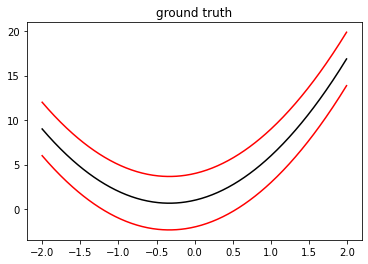

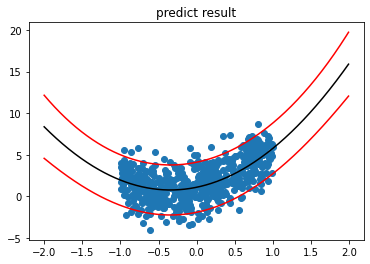

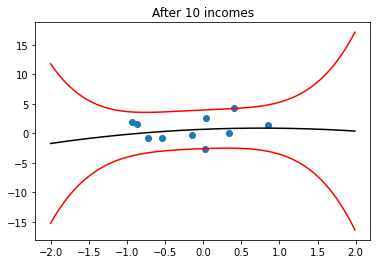

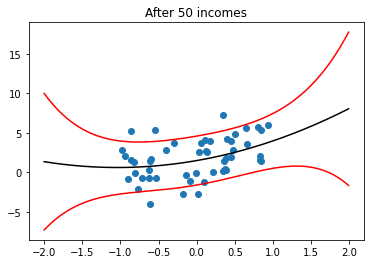

In [599]:
Baysian(1,3,3,[1,2,3])